#### The 6 Gaus Markov Conditions for using the OLS method for linear regression:

1) The target variable must be a linear function of the model's coefficients. The features themselves don't have to have a linear relationship with the target variable as long as their coefficients still share a linear relationship to those respective features.

2) The average of the error terms should equal zero.

3) The model needs to be homoscedastic; the distribution of the model's errors should be consistent throughout the model's predictions. The error variance should remain constant.

4) Low multicolinearity: the features shouldn't share extremely close correlations or the model risks overfitting to certain features and may not accurately predict the proper outcome.

5) The error terms should be uncorrelated; the error term of one observation shouldnt be able to predict the error term of another. This can be done with the autocorrelation function acf(errors)

6) Features shouldnt be correlated with the errors (exogeneity)

## Predicting Temperature:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from scipy.stats import bartlett, levene
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('SELECT * FROM weatherinszeged', con=engine)

engine.dispose()

In [3]:
weather.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
y = weather['temperature']
X = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        06:47:43   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
predictions = results.predict(X)
errors = y - predictions

print("Mean of the errors is: {}".format(np.mean(errors)))

Mean of the errors is: 1.2748130340250876e-11


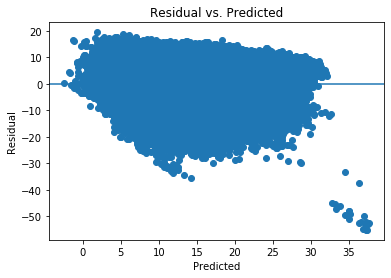

In [6]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [7]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


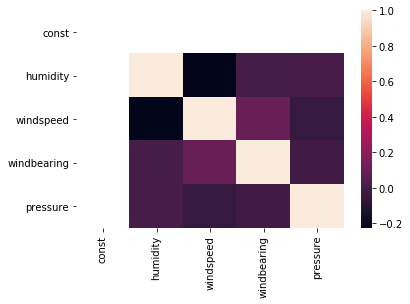

In [8]:
weather_corr = X.corr()
sns.heatmap(weather_corr)

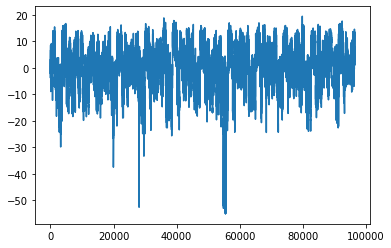

In [9]:
plt.plot(errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


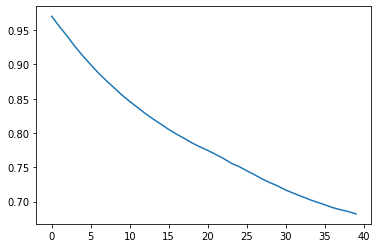

In [10]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

## Houseprices:

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
  postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

engine.dispose()

In [12]:
houseprices.drop('id', axis=1, inplace=True)
cols = houseprices.columns
for col in cols:
    if (houseprices[col].isnull().sum() * 100)/len(houseprices) > 0:
        houseprices.drop(col, axis=1, inplace=True)
cols = houseprices.columns
print(len(houseprices.columns))

61


In [13]:
numeric_list = []
for col in cols:
    if (houseprices[col].dtypes == np.int64) or (houseprices[col].dtypes == np.float64):
        numeric_list.append(col)
print(numeric_list)

['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']


In [14]:
num_df = houseprices[numeric_list]
num_df.head()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# Move target column to front
y = houseprices['saleprice']
num_df.drop('saleprice', axis=1, inplace=True)
num_df.insert(0, 'saleprice', y)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


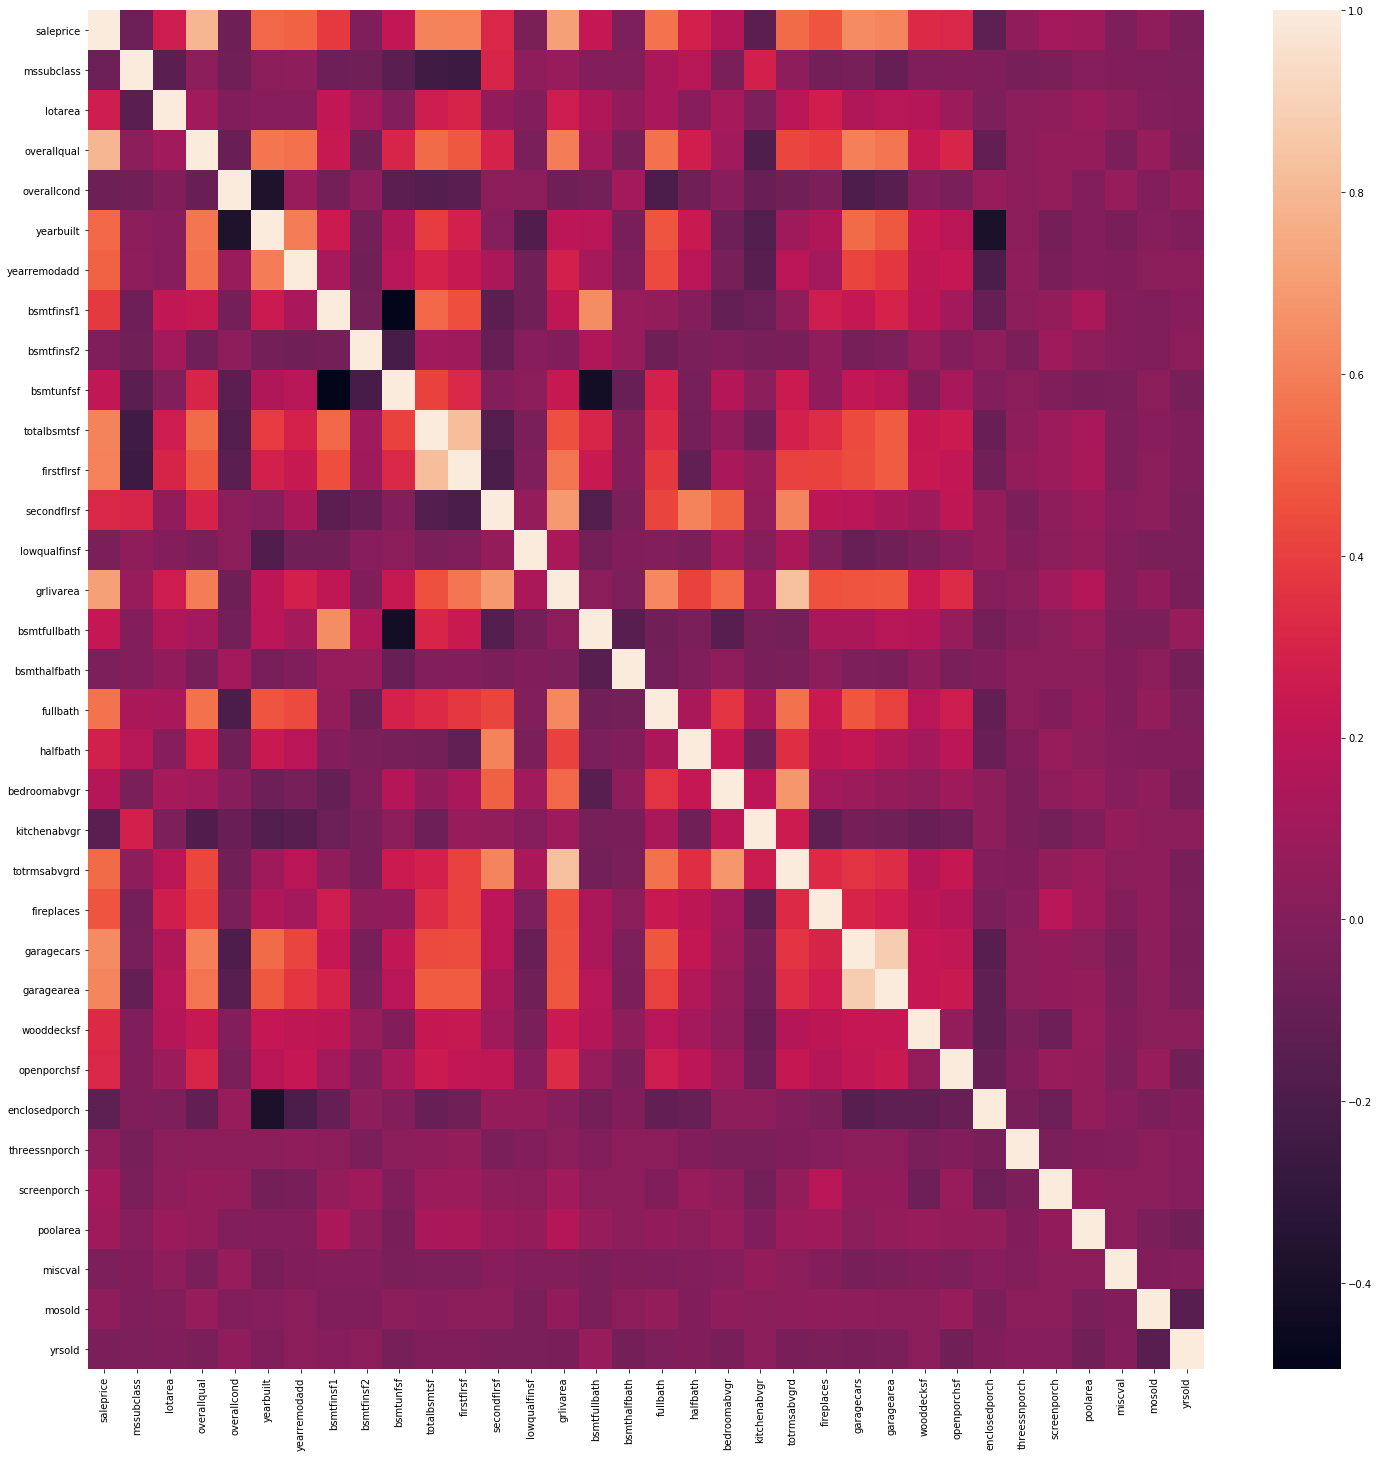

In [16]:
fig = plt.subplots(figsize=(25,25))
num_corr = num_df.corr()
sns.heatmap(num_corr)

In [17]:
# Populate list with all numeric columns and remove any that are too closely correlated

features = list(num_corr.columns)
print('original feature length: {}'.format(len(features)))

# Loops to check correlation under diagonal (where columns correlate with themselves)
for x in range(0, len(num_corr.columns), 1):
    col =  abs(num_corr.iloc[(x+1):, x]).sort_values(ascending=False)
    for y in range(len(col)):
        if col[y] > .700:
            if col.index[y] in features:
                features.remove(col.index[y])
#if 'saleprice' not in features:
#    features.append('saleprice')
print('new feature length: {}'.format(len(features)))

original feature length: 34
new feature length: 29


In [18]:
num_df = num_df[features]

In [19]:
# Make list of non-numeric columns
nonum_list = []
for col in cols:
    if col not in num_corr.columns: # num_corr chosen because it contains all numeric value columns
        nonum_list.append(col)
        
print(nonum_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation', 'heating', 'heatingqc', 'centralair', 'kitchenqual', 'functional', 'paveddrive', 'saletype', 'salecondition']


In [20]:
nonum_df = houseprices[nonum_list]
nonum_df.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,extercond,foundation,heating,heatingqc,centralair,kitchenqual,functional,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [21]:
new_corr = num_df.corr()

In [22]:
# add numeric columns to feats list
feats_list = []
sale = abs(new_corr.loc[:, 'saleprice']).sort_values(ascending=False)
for x in new_corr.columns:
    if x != 'saleprice':
        if sale[x] > .5000:
            feats_list.append(x)
print(feats_list)

['yearbuilt', 'yearremodadd', 'totalbsmtsf', 'fullbath', 'garagecars']


In [23]:
# add non-numeric columns to feats list
for x in nonum_df.columns:
    if len(nonum_df[x].unique()) < 5:
        feats_list.append(x)
print(feats_list)

['yearbuilt', 'yearremodadd', 'totalbsmtsf', 'fullbath', 'garagecars', 'street', 'lotshape', 'landcontour', 'utilities', 'landslope', 'exterqual', 'centralair', 'kitchenqual', 'paveddrive']


In [24]:
# turn all non-numeric categories into dummy columns
feats_df = houseprices[feats_list]
for col in feats_df.columns:
    if col in nonum_df.columns:
        dum_df = pd.get_dummies(feats_df[col], prefix= col, drop_first=True)
        feats_df = pd.concat([feats_df, dum_df], axis=1)
        feats_df.drop(col, axis=1, inplace=True)

In [25]:
# Fit with ordinary least squares method
y = houseprices.saleprice
X = feats_df
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     157.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        06:47:51   Log-Likelihood:                -17603.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1435   BIC:                         3.539e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.299e+04   1.69e+05     -0.255      0.799   -3.74e+05    2.88e+05
yearbuilt         -118.5391     58.280     -2.034      0.042    -232.862      -4.216
yearremodadd       199.8212     78.737      2.538      0.011      45.370     354.273
totalbsmtsf         42.3330      3.091     13.696      0.000      36.270      48.396
fullbath          2.863e+04   2501.205     11.446      0.000    2.37e+04    3.35e+04
garagecars        2.431e+04   1963.661     12.380      0.000    2.05e+04    2.82e+04
street_Pave       2.598e+04   1.86e+04      1.398      0.162   -1.05e+04    6.24e+04
lotshape_IR2      1.087e+04   6961.795      1.562      0.118   -2781.618    2.45e+04
lotshape_IR3     -2.905e+04   1.37e+04     -2.119      0.034    -5.6e+04   -2154.566
lotshape_Reg     -1.117e+04   2473.442     -4.517      0.000    -1.6e+04   -6319.387
landcontour_HLS   2.079e+04   8200.993      2.535      0.011    4699.323    3.69e+04
landcontour_Low   1.308e+04   9791.857      1.336      0.182   -6124.240    3.23e+04
landcontour_Lvl   8405.1383   5862.460      1.434      0.152   -3094.771    1.99e+04
utilities_NoSeWa -1.846e+04   4.23e+04     -0.436      0.663   -1.01e+05    6.45e+04
landslope_Mod     1.906e+04   6416.891      2.970      0.003    6469.930    3.16e+04
landslope_Sev     2.789e+04   1.35e+04      2.064      0.039    1387.455    5.44e+04
exterqual_Fa     -8.072e+04   1.55e+04     -5.221      0.000   -1.11e+05   -5.04e+04
exterqual_Gd     -4.845e+04   7387.912     -6.557      0.000   -6.29e+04    -3.4e+04
exterqual_TA     -7.155e+04   8093.002     -8.841      0.000   -8.74e+04   -5.57e+04
centralair_Y      1.716e+04   5195.210      3.303      0.001    6970.243    2.74e+04
kitchenqual_Fa   -6.415e+04   9828.232     -6.527      0.000   -8.34e+04   -4.49e+04
kitchenqual_Gd   -5.797e+04   5507.776    -10.524      0.000   -6.88e+04   -4.72e+04
kitchenqual_TA   -7.024e+04   6213.382    -11.305      0.000   -8.24e+04   -5.81e+04
paveddrive_P      7963.5797   9068.714      0.878      0.380   -9825.778    2.58e+04
paveddrive_Y      5840.9337   5306.885      1.101      0.271   -4569.151    1.63e+04
==============================================================================
Omnibus:                      476.496   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11059.088
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                      16.344   Cond. No.                     4.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical pr

In [26]:
predictions = results.predict(X)
errors = y - predictions

print("Mean of the errors is: {}".format(np.mean(errors)))

Mean of the errors is: 3.2184650317753016e-10


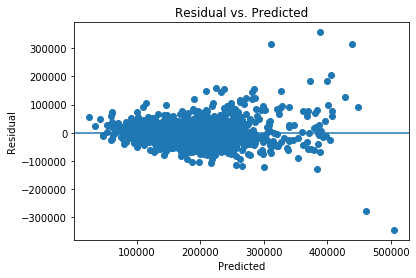

In [27]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 328.119 and p value is 2.47e-73
Levene test statistic value is 317.618 and p value is 1.6e-67


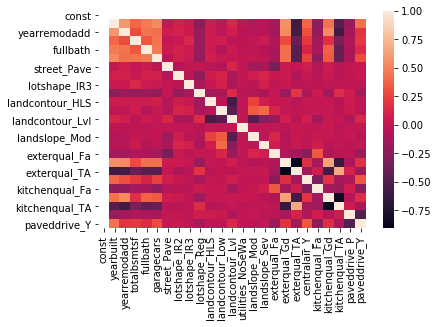

In [29]:
houses_corr = X.corr()
sns.heatmap(houses_corr)

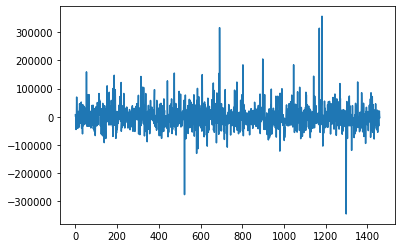

In [30]:
plt.plot(errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


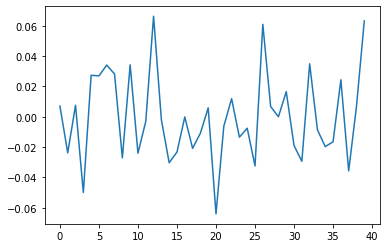

In [31]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()